In [1]:
import yfinance as yf
import numpy as np 
import pandas as pd

In [2]:
tickers=["AMZN","GOOG","MSFT"]
ohclv_data={}

In [3]:
for ticker in tickers:
    temp=yf.download(ticker,period='7mo',interval='1d')
    temp.dropna(how="any",inplace=True)
    ohclv_data[ticker]=temp

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [15]:
#Drawdown function
def max_dd(DF):
    df=DF.copy()
    df["return"]=df["Adj Close"].pct_change()
    df["cum_return"]=(1+df["return"]).cumprod()
    df["cum_roll_max"]=df["cum_return"].cummax()
    df["drawdown"]=df["cum_roll_max"]-df["cum_return"]
    return(df["drawdown"]/df["cum_roll_max"]).max()

In [18]:
def CAGR(DF):
    "function to calculate the Cumulative Annual Growth Rate of a trading strategy"
    df=DF.copy()
    df["return"]=DF["Adj Close"].pct_change()
    df["cum_return"]=(1+df["return"]).cumprod()
    n=len(df)/252
    CAGR=(df["cum_return"][-1])**(1/n)-1
    return CAGR

<AxesSubplot:xlabel='Date'>

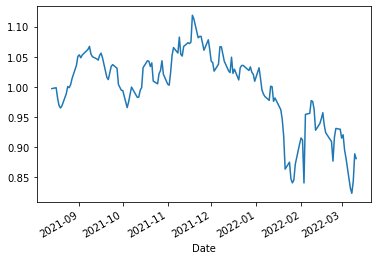

In [19]:
df["cum_return"].plot()

In [20]:
for ticker in ohclv_data:
    print("max drawdown of {} = {}".format(ticker,max_dd(ohclv_data[ticker])))

max drawdown of AMZN = 0.26400274997222456
max drawdown of GOOG = 0.1608695909252501
max drawdown of MSFT = 0.19436802468201614


In [21]:
#calamar ratio computation
def calamar(DF):
    df=DF.copy()
    return CAGR(df)/max_dd(DF)

In [25]:
for ticker in ohclv_data:
    print('Max Drawdown of {}={}'.format(ticker,max_dd(ohclv_data[ticker])))
    print('Calamar ratio of {}={}'.format(ticker,calamar(ohclv_data[ticker])))

Max Drawdown of AMZN=0.26400274997222456
Calamar ratio of AMZN=-0.739300187198504
Max Drawdown of GOOG=0.1608695909252501
Calamar ratio of GOOG=-0.5968844121298064
Max Drawdown of MSFT=0.19436802468201614
Calamar ratio of MSFT=-0.24431372038487306
